# Problem Set 7

Iris Lan

In [1]:
import math, kplr
from my_transit import FluxRatio
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [2]:
# Find the target KOI.
client = kplr.API()
koi = client.koi(97.01)

# Get a list of light curve datasets.
lcs = koi.get_light_curves(short_cadence=False)

# Open the first dataset and read it
file = lcs[0].open()
hdu_data = file[1].data
time = hdu_data["time"]  # get the time of each observation
flux = hdu_data["sap_flux"] # get the flux
ferr = hdu_data["sap_flux_err"] # get the error in the flux
file.close()

# store data in a table
KOI = Table([time, flux, ferr], names = ('time', 'flux', 'ferr'))
# KOI.show_in_notebook()

In [3]:
def I(r):
    '''A Limb-darkening function'''
    mu = (1 - (r**2))**(0.5)
    return 1 - (1 - (mu**(0.5)))

def func1(r, p, z):
    return I(r) * (1 - my_transit.delta(p,r,abs(z))) * 2 * r

def func2(r, p, z):
    return I(r) * 2 * r

## Problem 1

extract the data in the time range 124 < t < 125

In [15]:
eidx = np.intersect1d(np.where(time <= 125.0), np.where(time >= 124.0))
time = time[eidx]
flux = flux[eidx]
ferr = ferr[eidx]

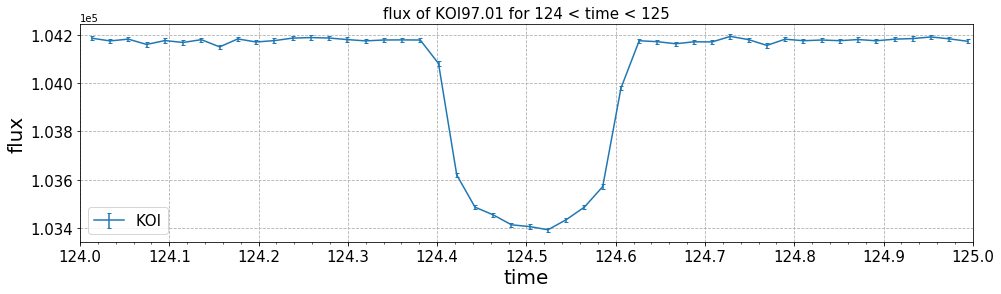

In [16]:
fig1, ax1 = plt.subplots(figsize = (16, 4))
ax1.errorbar(time, flux, yerr = ferr, fmt = '-', capsize = 2, label = 'KOI')

plt.xticks(fontsize = 15)
ax1.set_xlabel('time', size = 20)
xmajorLocator = MultipleLocator(0.1)
xminorLocator = MultipleLocator(0.02)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
ax1.set_xlim(124.0, 125.0)

plt.yticks(fontsize = 15)
ax1.set_ylabel('flux', size = 20)
ax1.ticklabel_format(style = 'sci', axis = 'y', scilimits = (0, 0))
ax1.set_title('flux of KOI97.01 for 124 < time < 125', fontsize = 15)
ax1.grid(ls = '--')

ax1.legend(loc = 3, fontsize = 15)

get $\overline{F}^\prime,\overline{\sigma}^\prime $

In [17]:
def normalize(f, n):
    
    def two_sigma_clipping(flux):
        F_p, sigma_p = np.mean(flux), np.std(flux)
        idx = np.where(abs(flux - F_p) / sigma_p <= 2)
        return flux[idx]
    
    i = 0
    while i < n:
#         print(i)
        f = two_sigma_clipping(f)
        i += 1
    
    return np.mean(f), np.std(f)

In [29]:
x = np.arange(100)
y = [normalize(flux, i)[0] for i in x]
z = [normalize(flux, i)[1] for i in x]

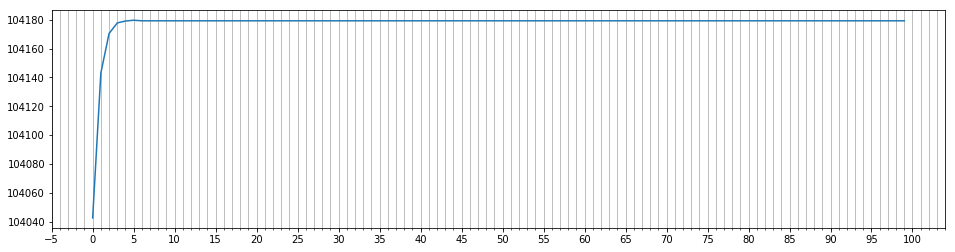

In [37]:
fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(x, y)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which = 'minor')

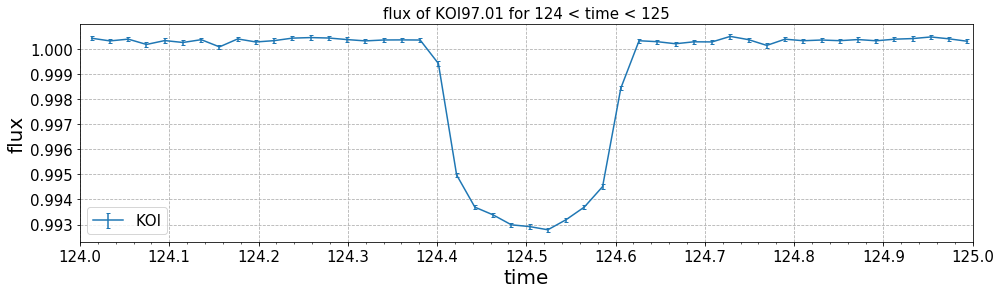

In [8]:
fig2, ax2 = plt.subplots(figsize = (16, 4))
ax2.errorbar(time, flux / F_p, yerr = ferr / F_p, fmt = '-', capsize = 2, label = 'KOI')

plt.xticks(fontsize = 15)
ax2.set_xlabel('time', size = 20)
xmajorLocator = MultipleLocator(0.1)
xminorLocator = MultipleLocator(0.02)
ax2.xaxis.set_major_locator(xmajorLocator)
ax2.xaxis.set_minor_locator(xminorLocator)
ax2.set_xlim(124.0, 125.0)

plt.yticks(fontsize = 15)
ax2.set_ylabel('flux', size = 20)
ax2.ticklabel_format(style = 'sci', axis = 'y', scilimits = (0, 0))
ax2.set_title('flux of KOI97.01 for 124 < time < 125', fontsize = 15)
ax2.grid(ls = '--')

ax2.legend(loc = 3, fontsize = 15)

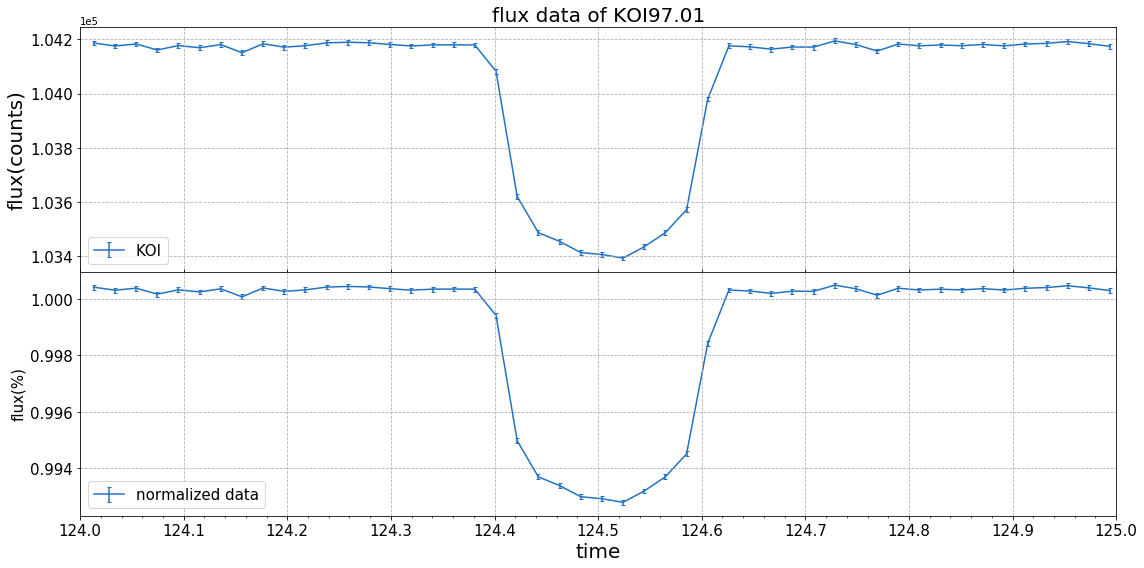

In [9]:
fig2, (axu, axb) = plt.subplots(2, 1, sharex = True, sharey = False, figsize = (16, 8))

axu.errorbar(time, flux, yerr = ferr, 
             fmt = '-', capsize = 2, c = '#2172C3', label = 'KOI', zorder = 1)
axb.errorbar(time, flux/F_p, yerr = ferr/F_p, 
             fmt = '-', capsize = 2, c = '#2172C3', label = 'normalized data', zorder = 1)

for ax in (axu, axb):
    ax.grid(ls = '--')
    ax.legend(loc = 3, fontsize = 15)
    ax.tick_params(axis = 'both', labelsize = 15)
    
axu.tick_params(axis = 'x', direction = 'in')
axu.ticklabel_format(style = 'sci', axis = 'y', scilimits = (0, 0), fontsize = 15)
axu.set_ylabel('flux(counts)', size = 20)
axu.set_title('flux data of KOI97.01', fontsize = 20)

axb.set_xlim(124.0, 125.0)
axb.set_xlabel('time', size = 20)
axb.xaxis.set_major_locator(xmajorLocator)
axb.xaxis.set_minor_locator(xminorLocator)
axb.set_ylabel('flux(%)', size = 15)

fig2.tight_layout()
fig2.subplots_adjust(hspace=0.0)

In [12]:
p = 0.0775
tau = 0.1
t_0 = 124.51

def z_func(t, t_0, tau):
    return (t - t_0) / tau

z = np.vectorize(z_func)
FluxRatio = np.vectorize(FluxRatio)

In [11]:
FluxRatio(p, z(time, t_0, tau))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [ ]:
def chi_square()